In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [121]:
df=pd.read_csv(r"C:\Users\bhavy\Downloads\SampleSuperstore.csv",index_col ="State")
df.head()


,Ship Mode,Segment,Country,City,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
State,,,,,,,,,,,,
Kentucky,Second Class,Consumer,United States,Henderson,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
Kentucky,Second Class,Consumer,United States,Henderson,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
California,Second Class,Corporate,United States,Los Angeles,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
Florida,Standard Class,Consumer,United States,Fort Lauderdale,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
Florida,Standard Class,Consumer,United States,Fort Lauderdale,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
regions=df['Region'].unique()
print(regions)

['South' 'West' 'Central' 'East']


<class 'pandas.core.series.Series'>


Text(0.5, 1.0, 'total buisnesses in each region')

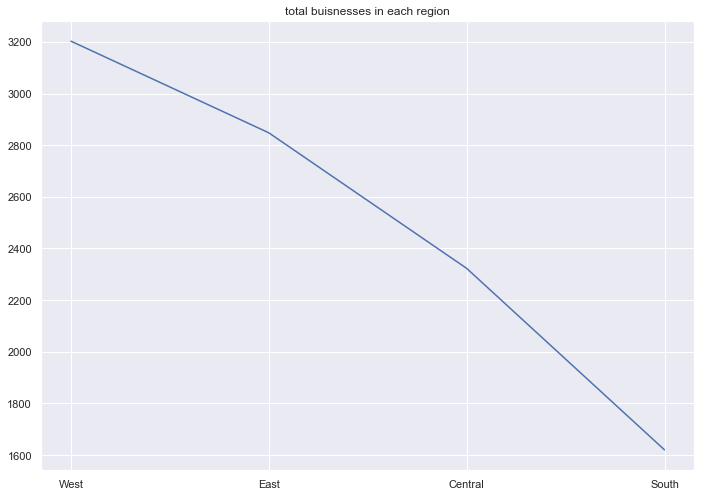

In [6]:
region_count=df['Region'].value_counts()
plt.plot(region_count)
print(type(region_count))
plt.title('total buisnesses in each region')

C:\Users\bhavy\anaconda3\lib\site-packages\seaborn\relational.py:936: UserWarning: relplot is a figure-level function and does not accept the ax= paramter. You may wish to try lineplot
  warnings.warn(msg, UserWarning)


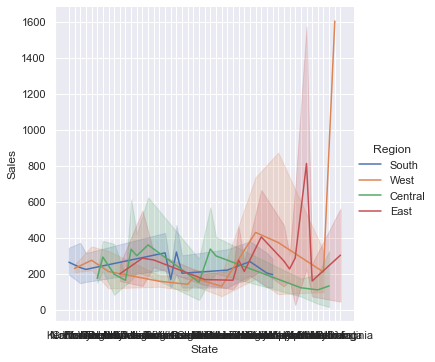

In [106]:
sns.set(rc={'figure.figsize':(10,10)})
sns.relplot(x='State', y='Sales', hue="Region",ax=ax, kind='line', data=df);
plt.plot()
plt.show()

comparison on buisness happeing in each category the south region


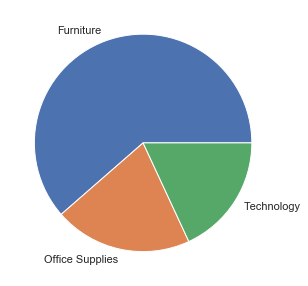

In [9]:
reg=df.groupby('Region')
south=reg.get_group('South')
print('comparison on buisness happeing in each category the south region')
plt.figure(figsize=(5,5))
plt.pie(south['Category'].value_counts(),labels=df['Category'].unique())
plt.show()


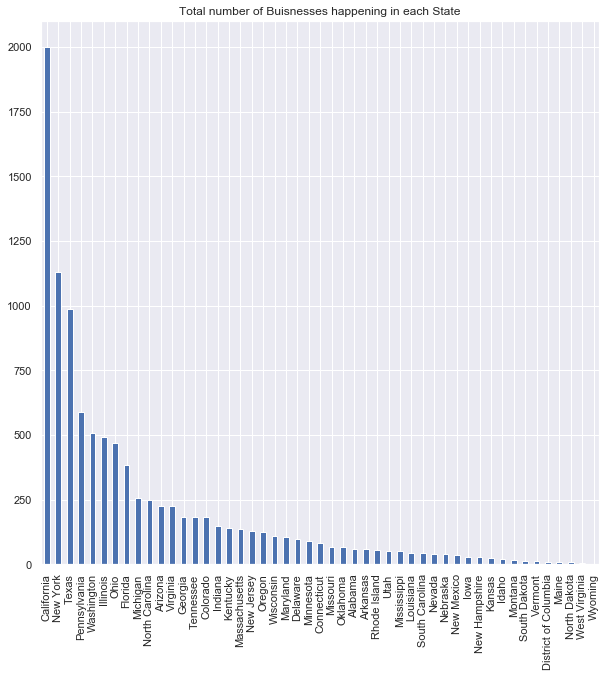

In [114]:
count=0
count_cities=[]
cities=df['City'].unique()
states = df["State"].value_counts()
# print(states)
plt.figure(figsize=(10,10))
states.plot.bar()
plt.title("Total number of Buisnesses happening in each State")
plt.show()


Text(0.5, 1.0, 'sales in California')

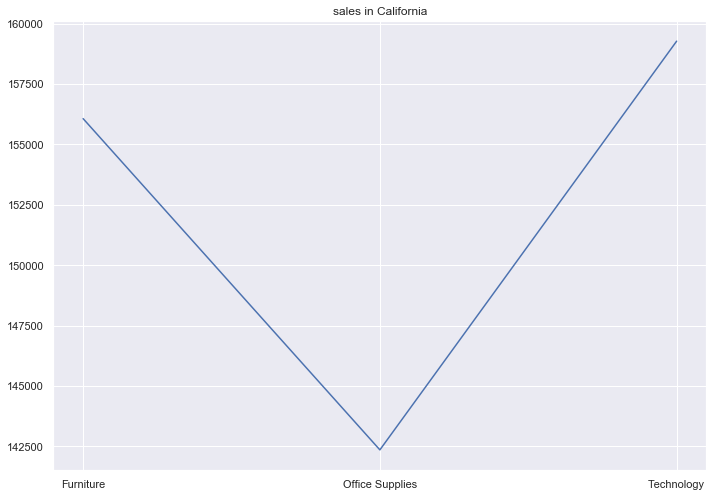

In [8]:
state_cat=df.groupby('State')
cal_state= state_cat.get_group('California').groupby('Category')
sales=[]
for i in df['Category'].unique():
#     regions_sales.append(sum(reg_sub.get_group(i)['Sales']))
    sales.append(sum(cal_state.get_group(i)['Sales']))
plt.plot(df['Category'].unique(),sales)
plt.title('sales in California')

<Figure size 1440x1440 with 0 Axes>

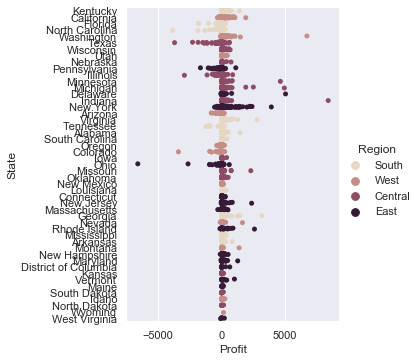

In [10]:
plt.figure(figsize=(20,20))
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.catplot(y='State', hue="Region", x='Profit',
            palette="ch:.25", edgecolor=".6",
            data=df)

sns.despine(left=True)
plt.show()

In [20]:
print(df['Ship Mode'].unique())

['Second Class' 'Standard Class' 'First Class' 'Same Day']


Text(0.5, 1.0, 'average profits in each category')

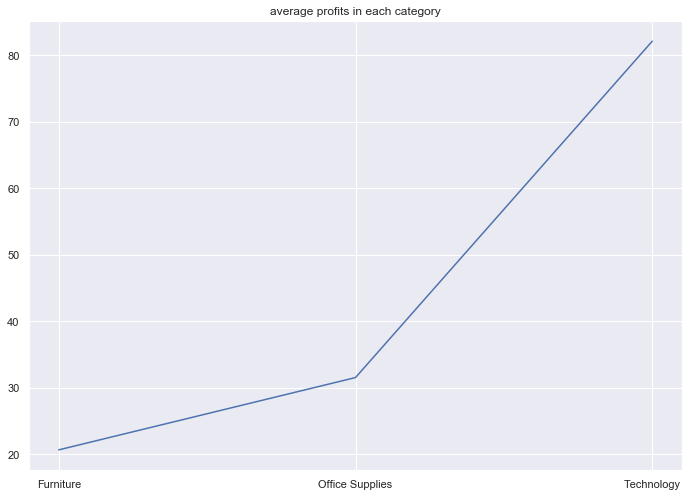

In [56]:
profits=[]
# cal_state.head()
for i in df['Category'].unique():
#     profits.append(sum(regions.get_group(i)['Sales']))
    profits.append((sum(cal_state.get_group(i)['Profit'])/len(cal_state.get_group(i))))
plt.plot(df['Category'].unique(),profits)
plt.title('average profits in each category')

Text(0.5, 1.0, 'total buissness in each category')

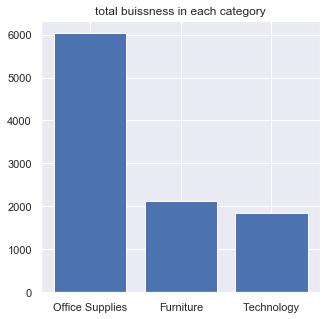

In [13]:
plt.figure(figsize=(5,5))
plt.bar(list(df['Category'].value_counts().keys()),list(df['Category'].value_counts()))
plt.title('total buissness in each category')

[391721.9050000003, 725457.8245000006, 501239.8908000005, 678781.2399999979]


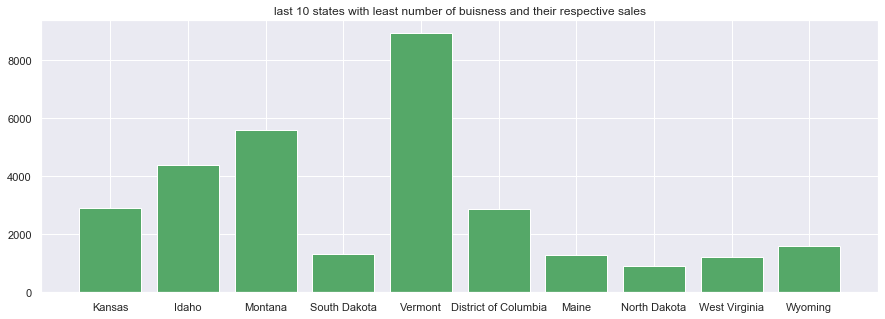

In [129]:
low_sales_states=states.tail(10).keys()
low_sales=states.tail(10)
sales_cat=[]
for i in low_sales_states:
    sales_cat.append((sum(state_cat.get_group(i)['Sales'])))
plt.figure(figsize=(15,5))
plt.bar(low_sales_states,sales_cat, color='g')
plt.title('last 10 states with least number of buisness and their respective sales')
print(regions_sales)

Text(0.5, 1.0, 'number of buisnesses in low sales states')

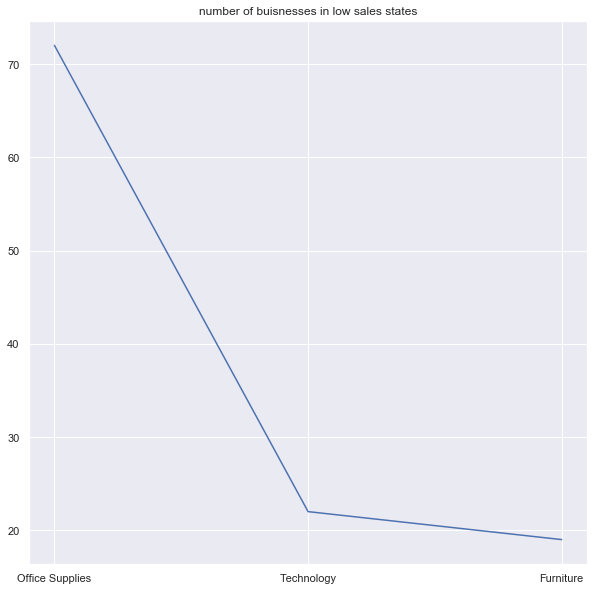

In [128]:
lowsales=df.loc[low_sales_states]
plt.plot(lowsales['Category'].value_counts())
plt.title('number of buisnesses in low sales states')

In [ ]:
df['Ship Mode'].value_counts()

In [14]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [15]:
cat=df.groupby('Category')
catf=cat.get_group('Technology')
subsf=catf['Sub-Category'].unique()
print(subsf)

['Phones' 'Accessories' 'Machines' 'Copiers']


Profit of Phones  =  50.073937682789655
Profit of Accessories  =  54.11178799999991
Profit of Machines  =  29.432668695652165
Profit of Copiers  =  817.9091897058825


Text(0.5, 1.0, 'average profits in each subcategory in technology')

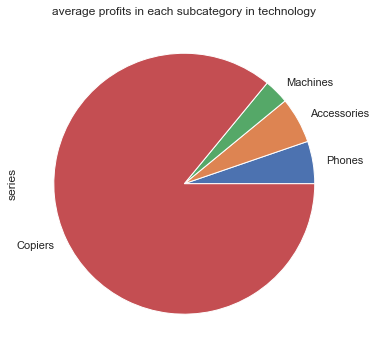

In [127]:
#cat=data separated with all categories
#catf=only furniture categoy data
#subsf=sub categories in catf
#sub=data separated with all subcategories in furniture


sub=catf.groupby('Sub-Category')
avg=[]
for i in subsf:
    avgi=(sum(sub.get_group(i)['Profit'])/len(sub.get_group(i)))
    avg.append((avgi))
    print('Profit of',i,' = ',avgi)
# plt.figure(figsize=(5,5))
# plt.bar(subsf,avg)
# plt.title('average profit in each subcategory in technology')
series=pd.Series(avg, index=subsf, name="series")
series.plot.pie(figsize=(6, 6));
plt.title('average profits in each subcategory in technology')

Text(0.5, 1.0, 'total sales in each subcategory in technology')

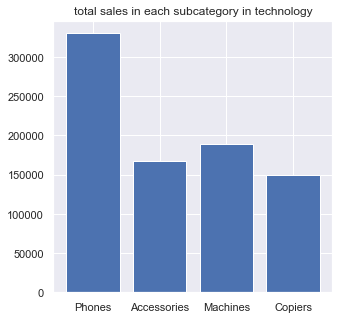

In [17]:

salesf=[]
for i in subsf:
    salesf.append((sum(sub.get_group(i)['Sales'])))
plt.figure(figsize=(5,5))
plt.bar(subsf,salesf)
plt.title('total sales in each subcategory in technology')

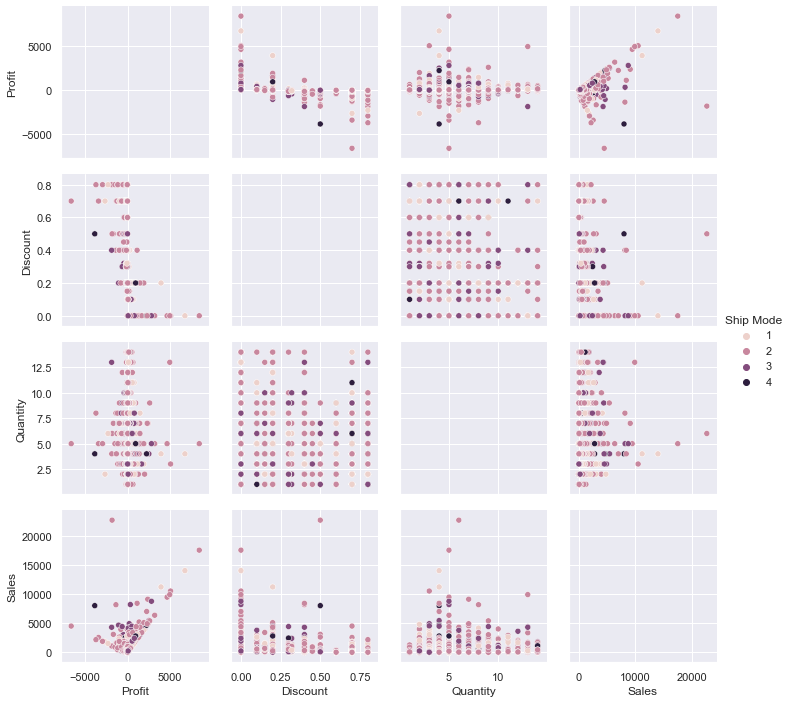

In [22]:
data=pd.DataFrame(df,columns=['Profit','Discount','Quantity','Sales','Ship Mode'])
# dataset['class']=dataset['class'].map({'happy':0, 'sad':1, 'angry': 2, 'relax':3 }).astype(int)
data['Ship Mode']=data['Ship Mode'].map({'First Class':1,'Standard Class':2,'Second Class':3,'Same Day':4}).astype(int)
g = sns.PairGrid(data, hue="Ship Mode")
# g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

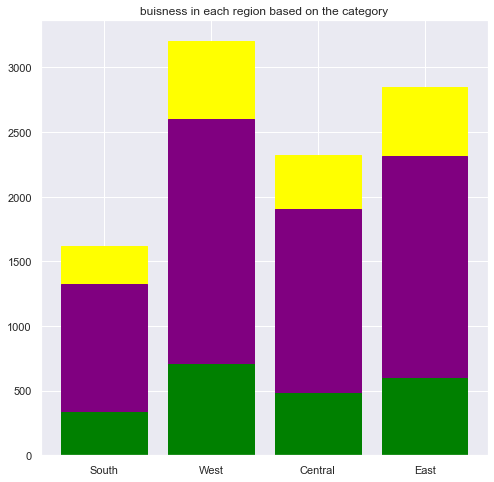

furniture=green
office supplies=purple
technology=yellow


In [83]:
furn=[]
off=[]
tech=[]
columns=regions
reg=df.groupby('Region')
pos=np.arange(4)
for i in regions:
    reggrp=reg.get_group(i).groupby('Category')
    furn.append(len(reggrp.get_group('Furniture')))
    off.append(len(reggrp.get_group('Office Supplies')))
    tech.append(len(reggrp.get_group('Technology')))
var_one=np.array(furn)
var_two=np.array(off)
var_three=np.array(tech)
plt.figure(figsize=(8,8))

plt.title('buisness in each region based on the category')
plt.bar(pos, np.add(np.add(var_three, var_two), var_one), color='yellow', edgecolor='yellow')
plt.bar(pos, np.add(var_two, var_one), color='purple', edgecolor='purple')
plt.bar(pos, var_one, color='green', edgecolor='green')
plt.xticks(pos, columns)
plt.show()
print('furniture=green')
print('office supplies=purple')
print('technology=yellow')

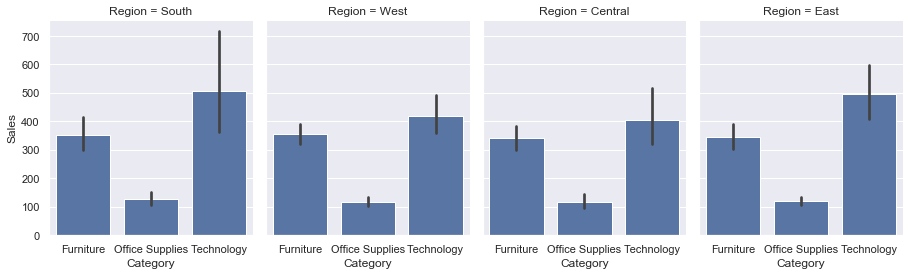

In [126]:
# avgf=sum(salesf['Sales'])/len(salesf)
# print('average of furniture sales:',avgf)
# subcat=salesf.groupby('Sub-Category')

# print('maximum sales')
cat=df['Category'].unique()
g = sns.FacetGrid(df, col='Region', height=4, aspect=.8)
g.map(sns.barplot, 'Category','Sales',order=cat)
plt.show()

In [18]:
catf.describe().transpose()

Category              Furniture  Office Supplies    Technology
Postal Code count   2121.000000      6026.000000   1847.000000
            mean   55726.556341     54890.951211  55551.572279
            std    32261.888225     32046.665773  31896.118284
            min     1040.000000      1453.000000   1841.000000
            25%    22801.000000     23223.000000  23392.000000
            50%    60505.000000     55247.000000  59601.000000
            75%    90032.000000     90004.000000  90008.000000
            max    99301.000000     99301.000000  99207.000000
Sales       count   2121.000000      6026.000000   1847.000000
            mean     349.834887       119.324101    452.709276
            std      503.179145       382.182228   1108.655848
            min        1.892000         0.444000      0.990000
            25%       47.040000        11.760000     68.016000
            50%      182.220000        27.418000    166.160000
            75%      435.168000        79.920000    448.534000
            max     4416.174000      9892.740000  22638.480000
Quantity    count   2121.000000      6026.000000   1847.000000
            mean       3.785007         3.801195      3.756903
            std        2.251620         2.218513      2.216828
            min        1.000000         1.000000      1.000000
            25%        2.000000         2.000000      2.000000
            50%        3.000000         3.000000      3.000000
            75%        5.000000         5.000000      5.000000
            max       14.000000        14.000000     14.000000
Discount    count   2121.000000      6026.000000   1847.000000
            mean       0.173923         0.157285      0.132323
            std        0.181547         0.229495      0.141575
            min        0.000000         0.000000      0.000000
            25%        0.000000         0.000000      0.000000
            50%        0.200000         0.000000      0.200000
            75%        0.300000         0.200000      0.200000
            max        0.700000         0.800000      0.700000
Profit      count   2121.000000      6026.000000   1847.000000
            mean       8.699327        20.327050     78.752002
            std      136.049246       164.887280    428.816633
            min    -1862.312400     -3701.892800  -6599.978000
            25%      -12.849000         2.101500      5.203650
            50%        7.774800         6.882400     25.018200
            75%       33.726600        19.416300     74.894600
            max     1013.127000      4946.370000   8399.976000

Text(0.5, 1.0, 'Total number of sales for each segment')

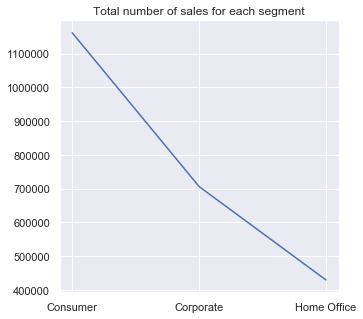

In [24]:
seg=df.groupby('Segment')
plt.figure(figsize=(5,5))
saless=[]
for i in df['Segment'].unique():
    saless.append(sum(seg.get_group(i)['Sales']))
plt.plot(df['Segment'].unique(),saless)
plt.title('Total number of sales for each segment')

['Furniture' 'Office Supplies' 'Technology']


Text(0.5, 1.0, '')

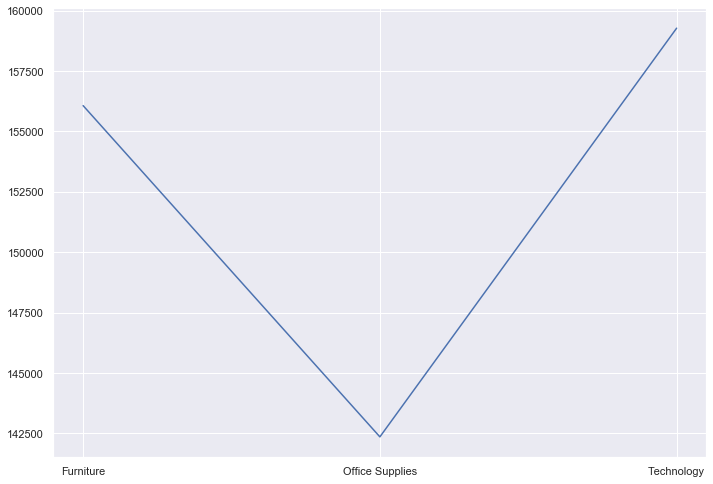

In [49]:
subc=seg.get_group('Home Office')
homeofficesales=subc.groupby('Category')
salesc=[]
# homeofficesales.get_group('Furniture').head()
cat=df['Category'].unique()
print(cat)
for i in cat:
    salesc.append(sum(homeofficesales.get_group(i)['Sales']))
plt.plot(cat,sales)
plt.title('')

1. Total sales in South is very less
2. The average profit in techology is high
3. In the south the total number of buisness is very less in technology and the profit is more
4. In California the total sales in office supplies is less and that of technology is very high and the sales is the highest of office supplies, so cannot go under loss
5. In technology the total sales in copiers is less but the profit in copiers is very high.
6. In states where buisnesses are less, considering the last 10 states with less buisness, on an average furniture has the least sales and office supplies has the most, technology is less in these states as well, hence, technology cn be promoted in these states and profit is more.
7. The number of buissness is more in furniture in the south region but the sales is coparatively more in technology
8. The segment where least buisness happens is of the home office, the requiremments for them is mainly in the technology field.
9. The average profit by applying discounts do not affect the buisness much. Discounts do not help very much in profits
10. The shipment mode is mainly of the second class and the sales is comparatively higher of the second class.